In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import jax
import flax


/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)
/Users/ameyad/Documents/spherical-harmonic-net/.venv/lib/python3.10/site-packages/flax/struct.py:136: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(data_clz, keypaths)


In [2]:
with open("../4SEP_logs/logging_outputs_attempt1/log_10000.pkl", "rb") as f:
    logs_1 = pickle.load(f)

with open("../4SEP_logs/logging_outputs_attempt2/log_10000.pkl", "rb") as f:
    logs_2 = pickle.load(f)

print(logs_1.keys(), logs_2.keys())

dict_keys(['grad_norms', 'param_norms', 'params', 'focus_and_atom_type_losses', 'num_nodes', 'num_edges']) dict_keys(['grad_norms', 'param_norms', 'params', 'focus_and_atom_type_losses', 'num_nodes', 'num_edges'])


In [3]:
for num_nodes_1, num_nodes_2 in zip(logs_1["num_nodes"], logs_2["num_nodes"]):
    assert np.allclose(num_nodes_1, num_nodes_2)

for num_edges_1, num_edges_2 in zip(logs_1["num_edges"], logs_2["num_edges"]):
    assert np.allclose(num_edges_1, num_edges_2)

In [4]:
def flatten_dicts(d_series):
    keys = set(k for k in flax.traverse_util.flatten_dict(d_series[0]))
    d_flat = {k: [] for k in keys}
    for d in d_series:
        for k in keys:
            d_flat[k].append(flax.traverse_util.flatten_dict(d)[k])
    d_flat = {k: np.array(v) for k, v in d_flat.items()}
    return d_flat

In [5]:
flattened_grad_norms_1 = flatten_dicts(logs_1["grad_norms"][::100])
flattened_grad_norms_2 = flatten_dicts(logs_2["grad_norms"][::100])
steps = np.arange(len(logs_1["grad_norms"]))[::100]

232.49298


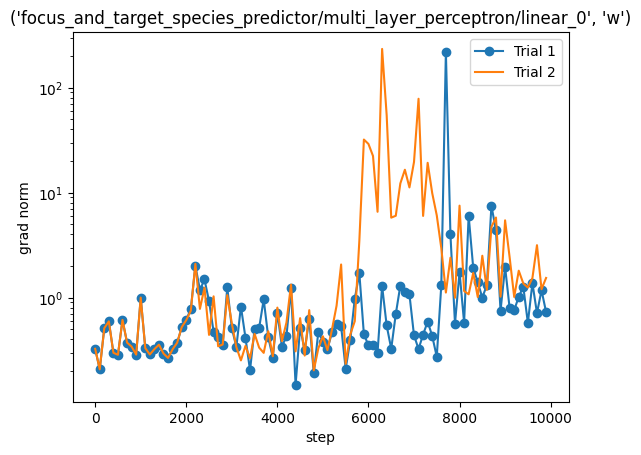

259.00333


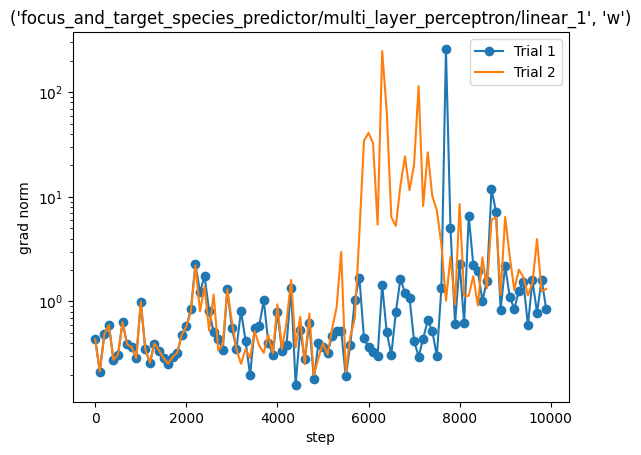

335.35928


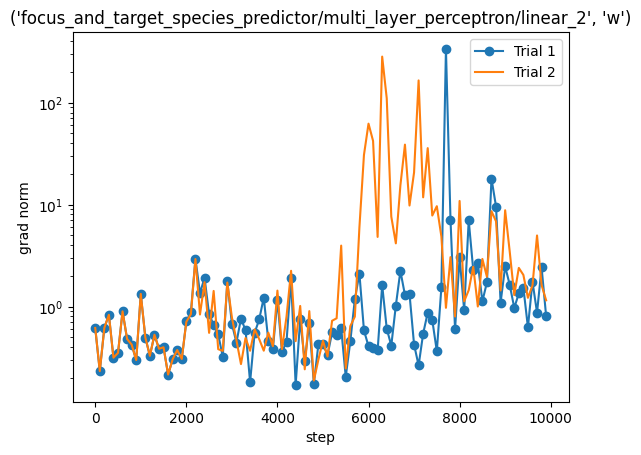

293.93558


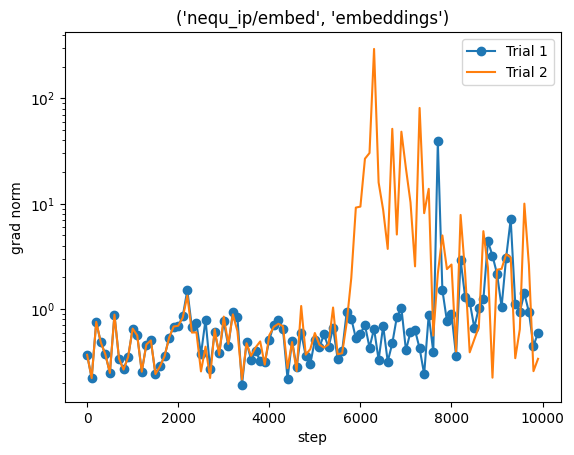

67.88594


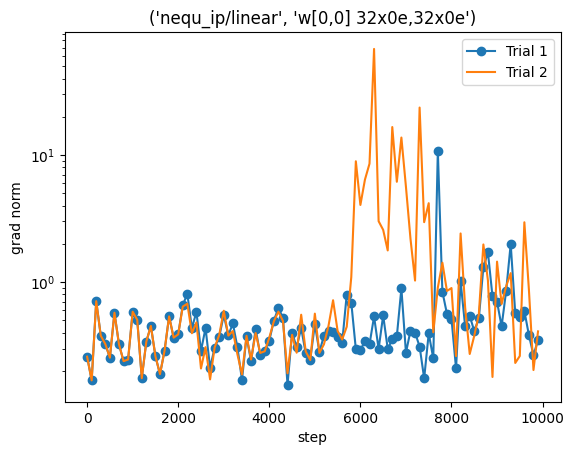

89.85627


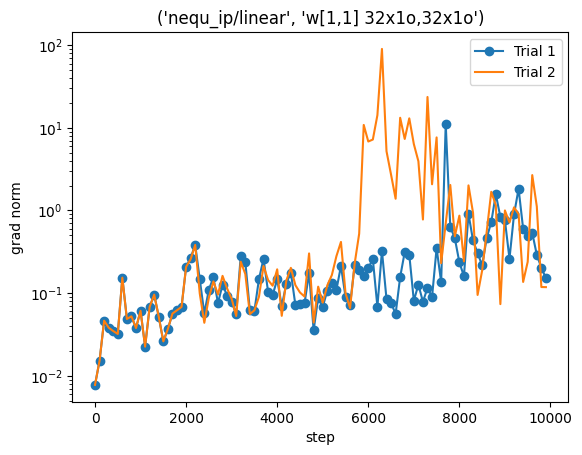

9.115266


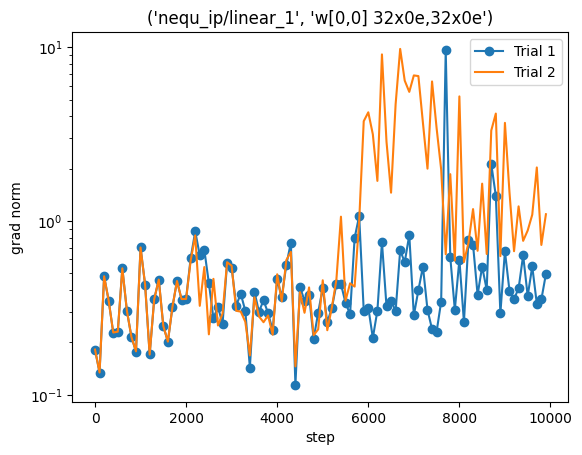

216.67567


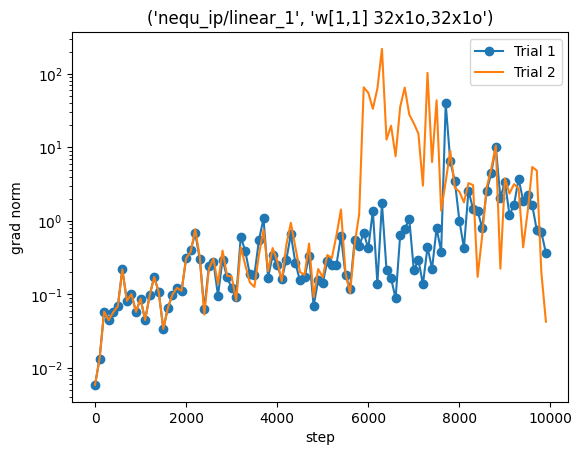

215.67822


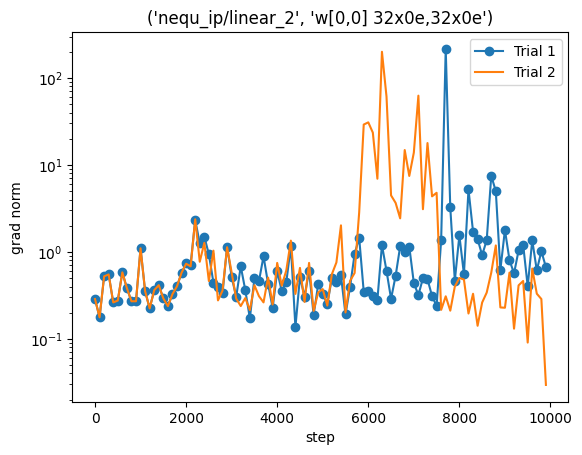

56.0761


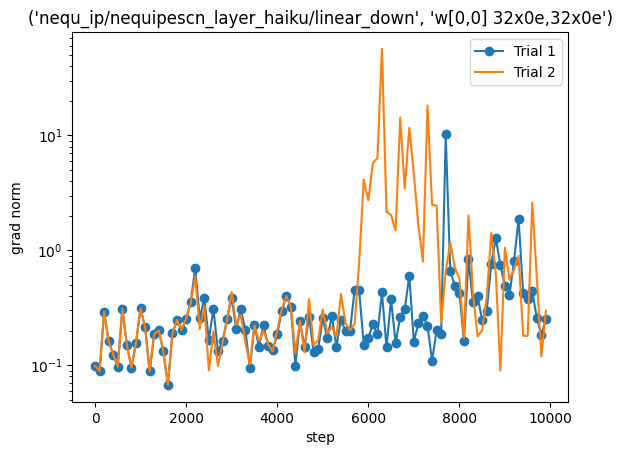

95.430336


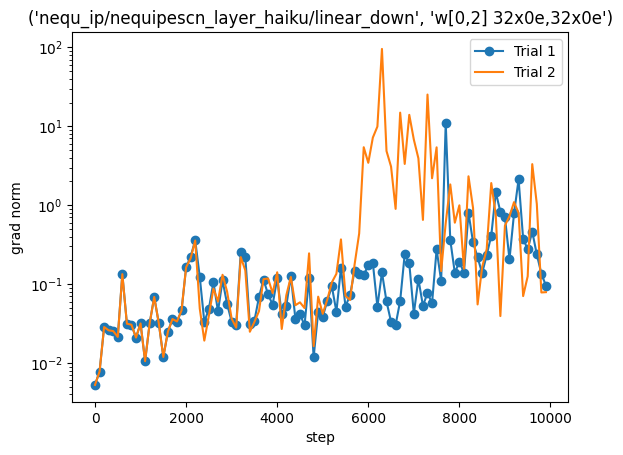

97.059044


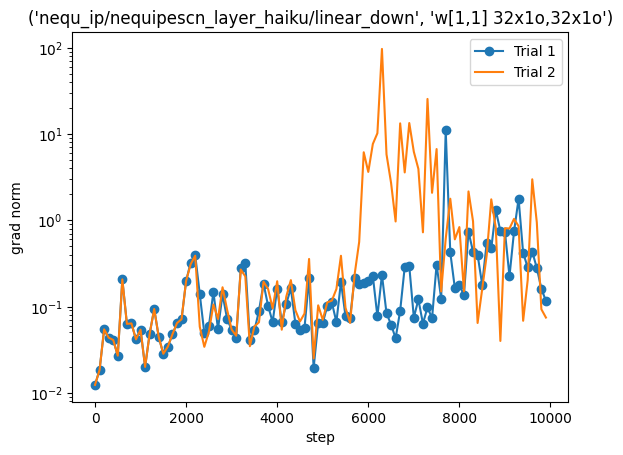

201.24225


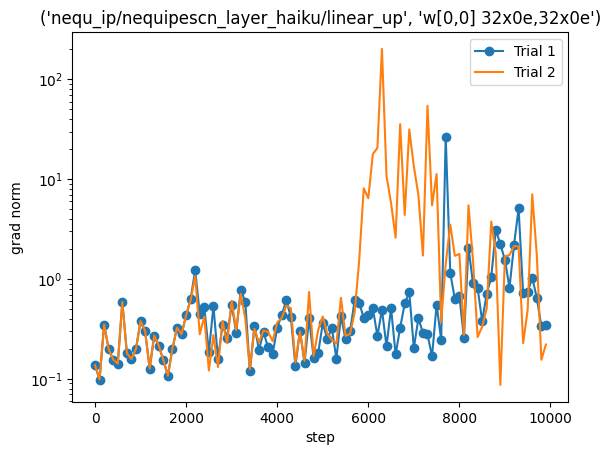

218.95526


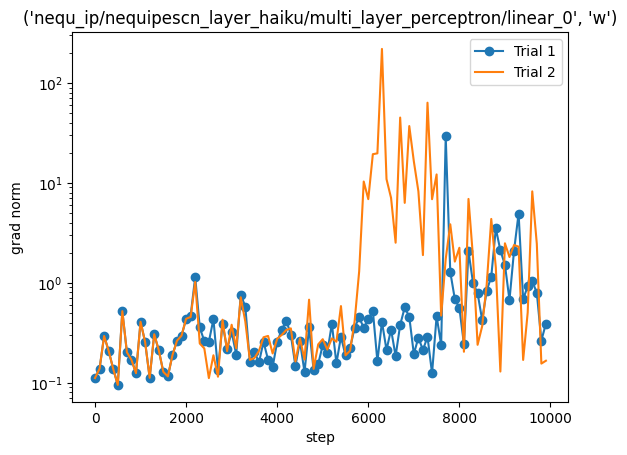

217.3662


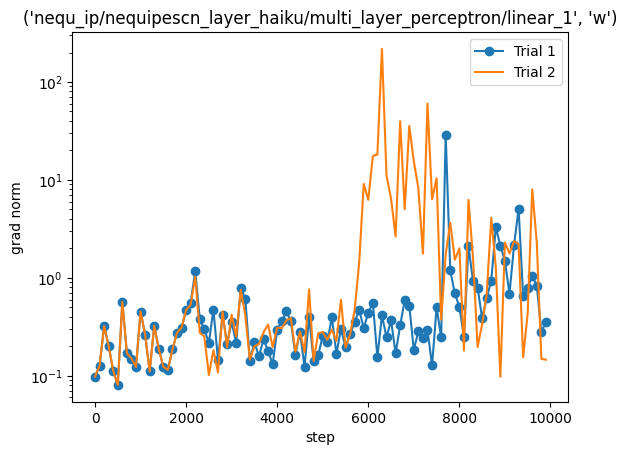

165.51065


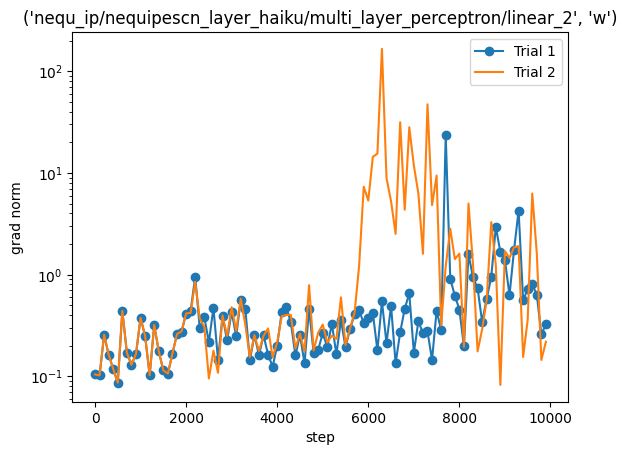

10.2534485


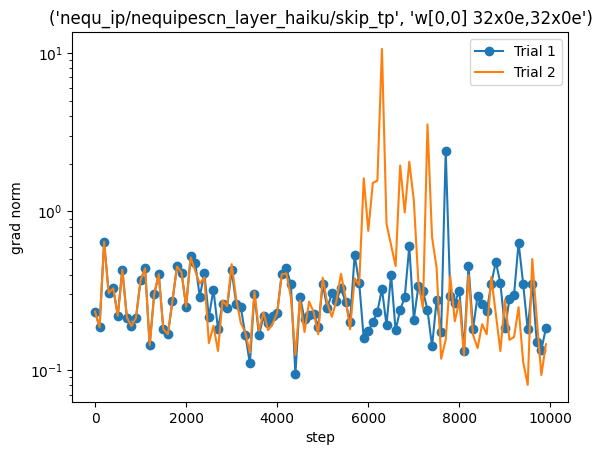

24.016375


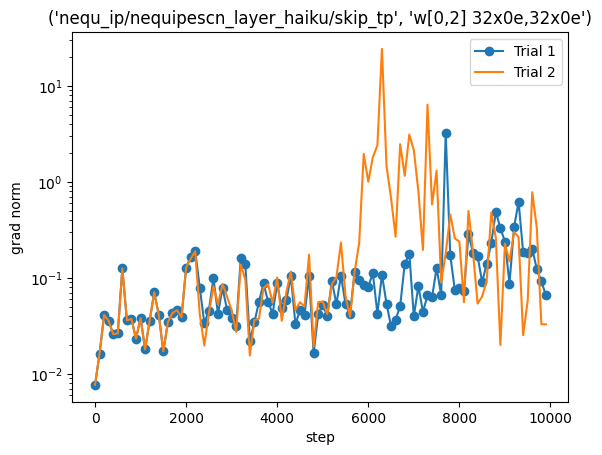

8.699632


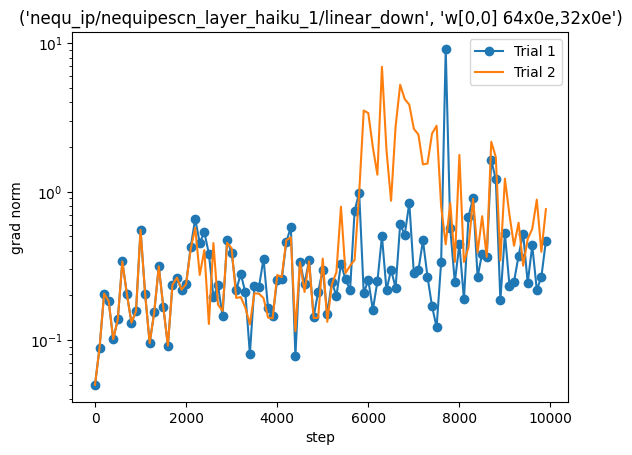

135.88728


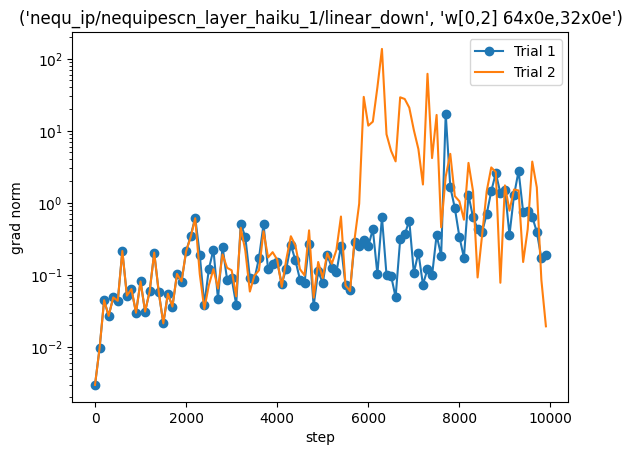

90.08141


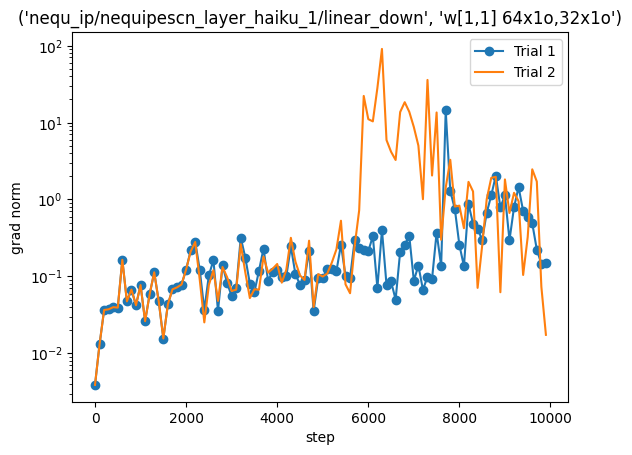

73.16372


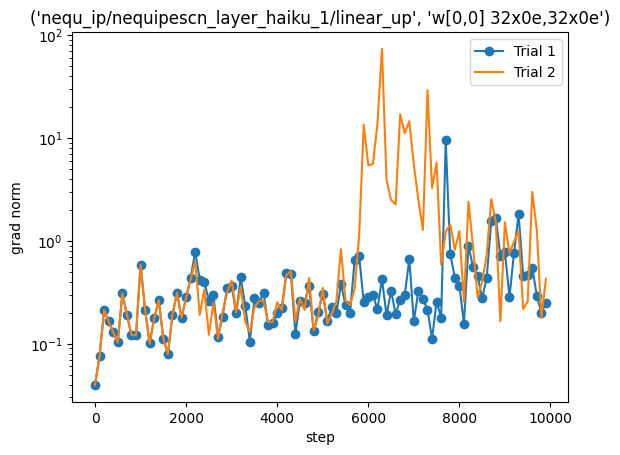

80.48846


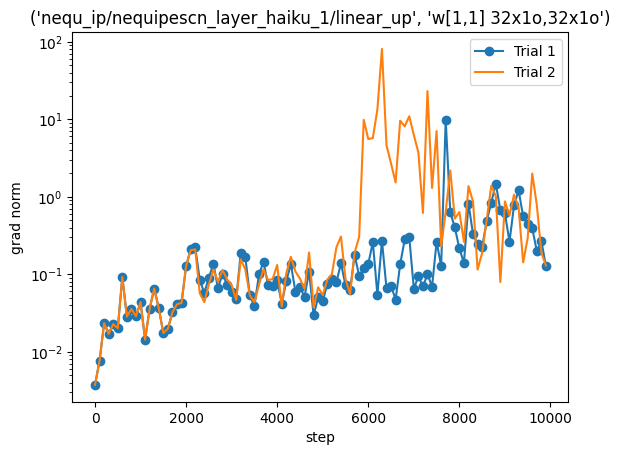

211.84471


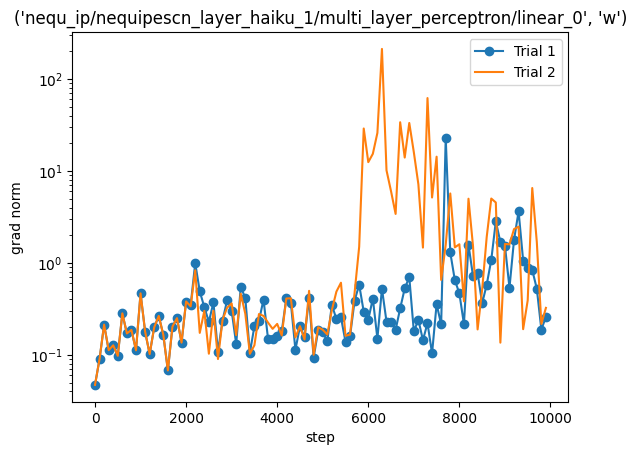

156.2649


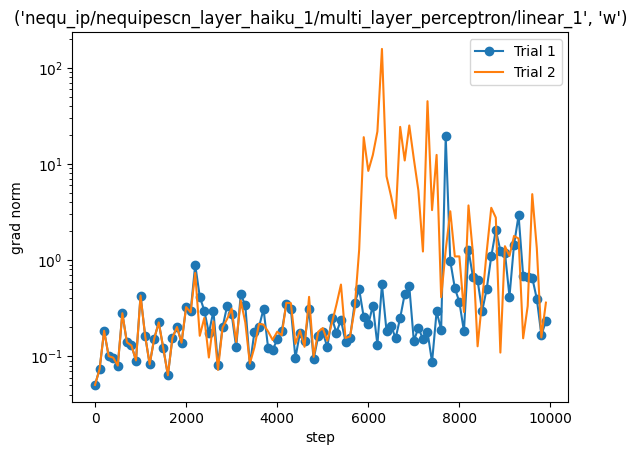

111.30197


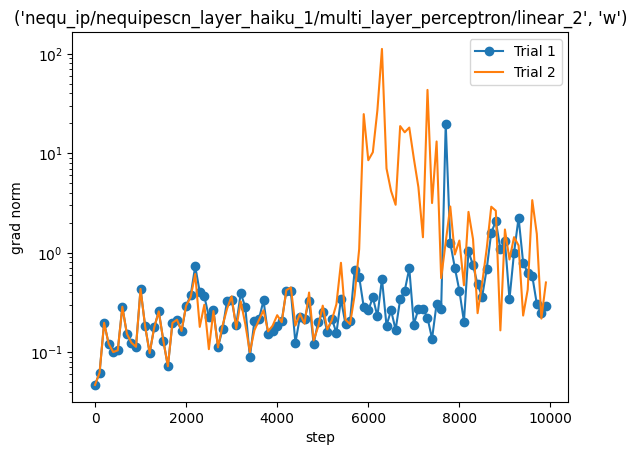

2.0299888


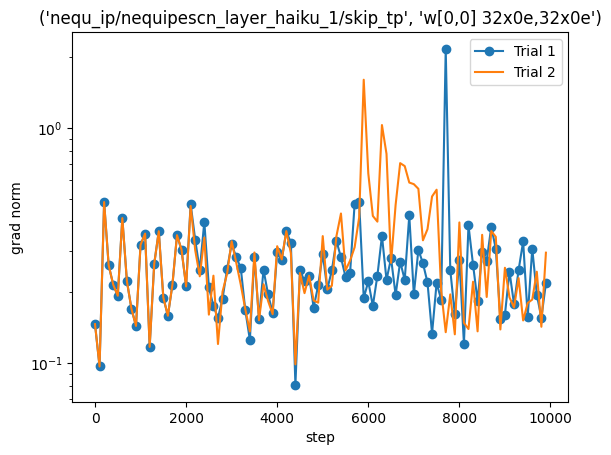

15.53464


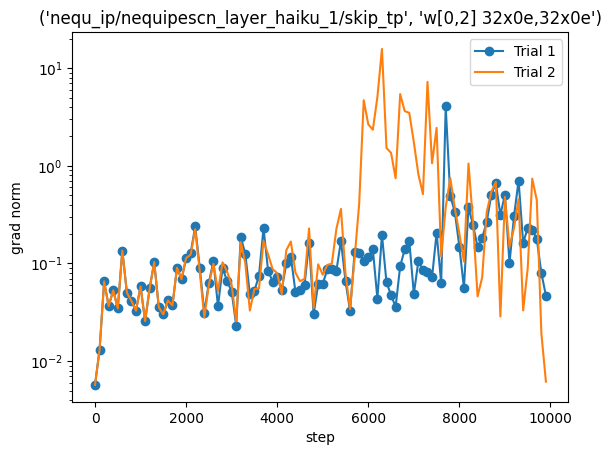

25.924448


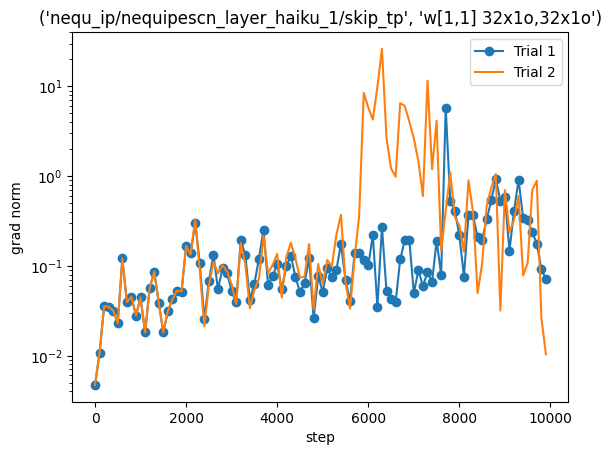

456.6802


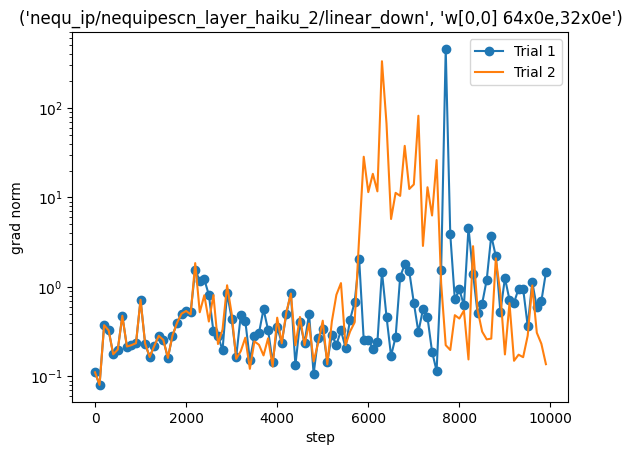

5.2636337


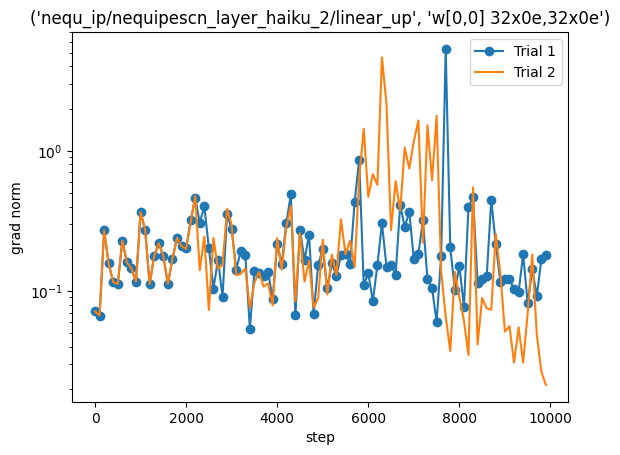

289.50195


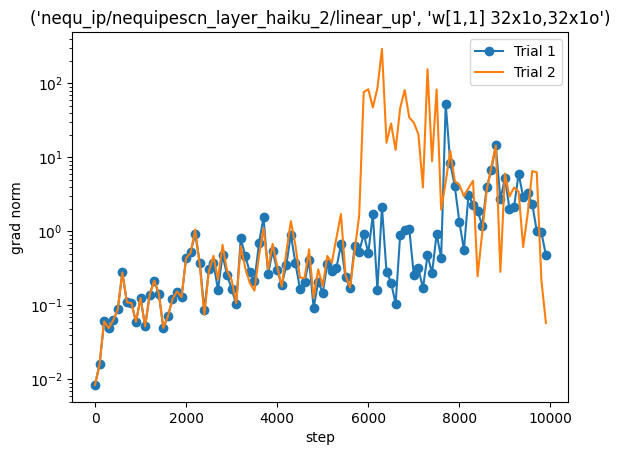

1020.41693


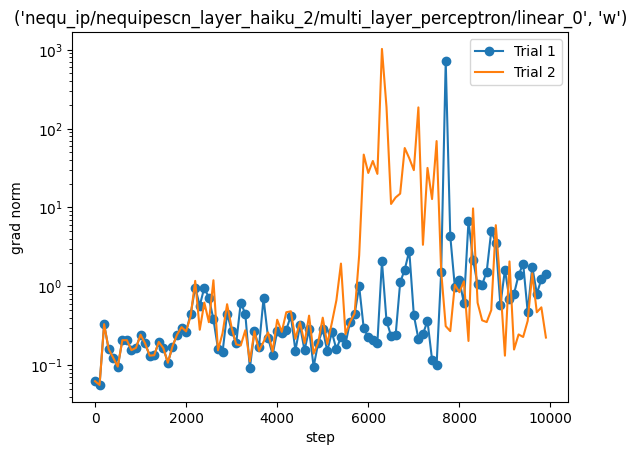

655.8431


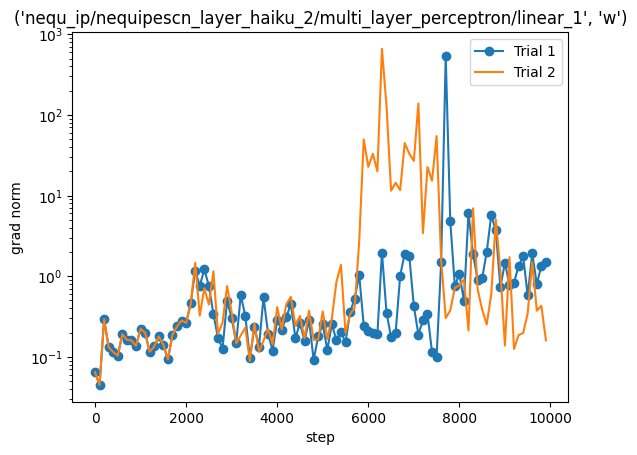

584.9179


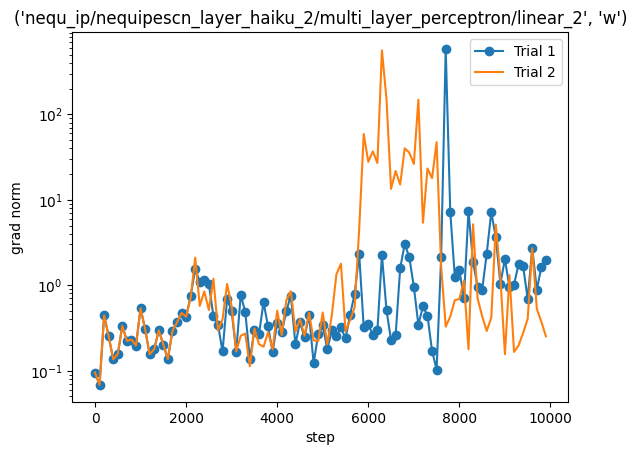

4.6794157


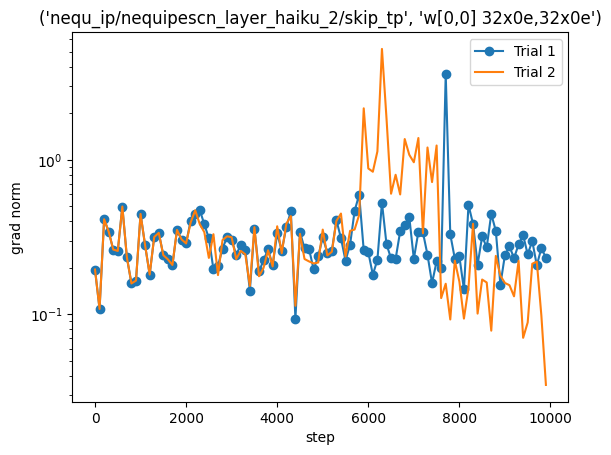

In [6]:
for k in sorted(flattened_grad_norms_1.keys()):
    if flattened_grad_norms_1[k][0] == 0.:
        continue
    # assert (flattened_grad_norms_1[k] == flattened_grad_norms_2[k]).all(), np.abs(flattened_grad_norms_1[k] - flattened_grad_norms_2[k]).max()
    print(np.abs(flattened_grad_norms_1[k] - flattened_grad_norms_2[k]).max())
    plt.plot(steps, flattened_grad_norms_1[k], '-o', label="Trial 1")
    plt.plot(steps, flattened_grad_norms_2[k], label="Trial 2")
    plt.title(k)
    plt.legend()
    plt.ylabel("grad norm")
    plt.xlabel("step")
    plt.yscale("log")
    plt.show()

In [7]:
flattened_param_norms_1 = flatten_dicts(logs_1["param_norms"][::100])
flattened_param_norms_2 = flatten_dicts(logs_2["param_norms"][::100])

In [8]:
print(len(flattened_param_norms_1))

134


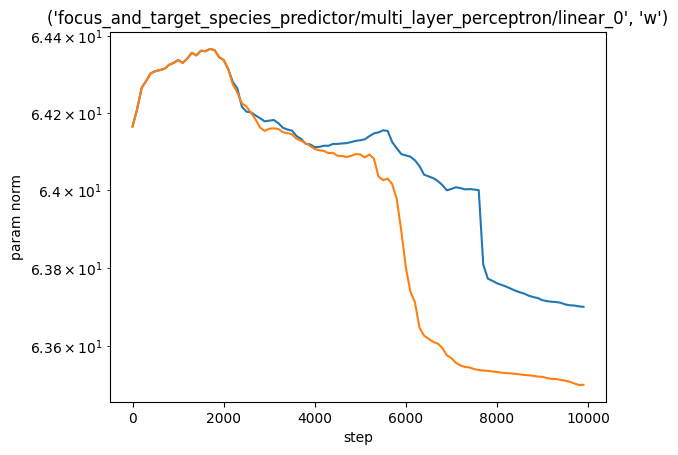

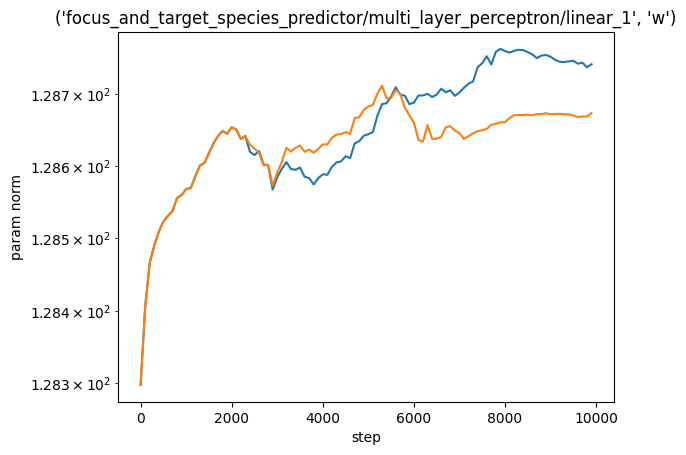

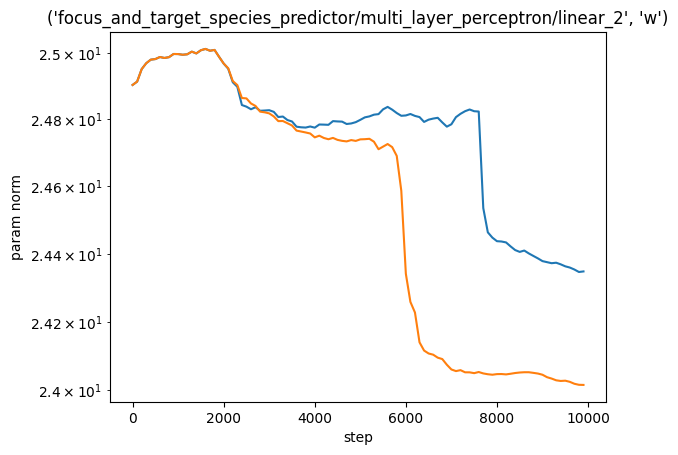

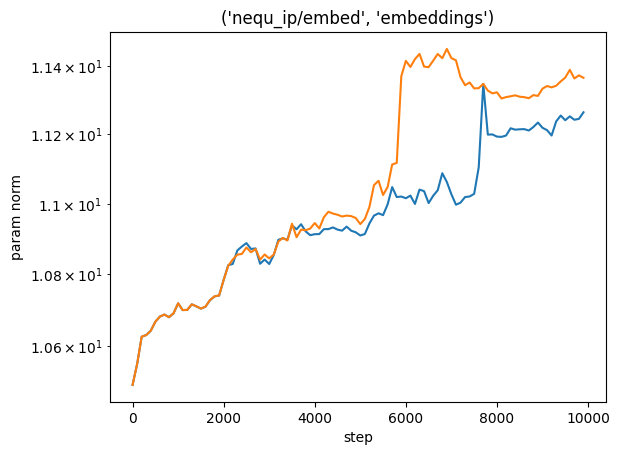

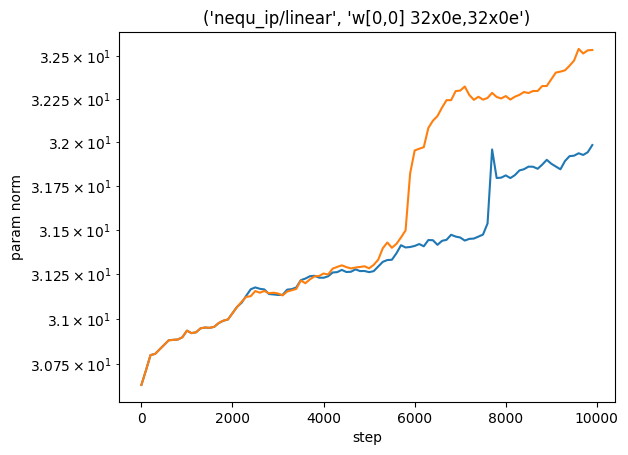

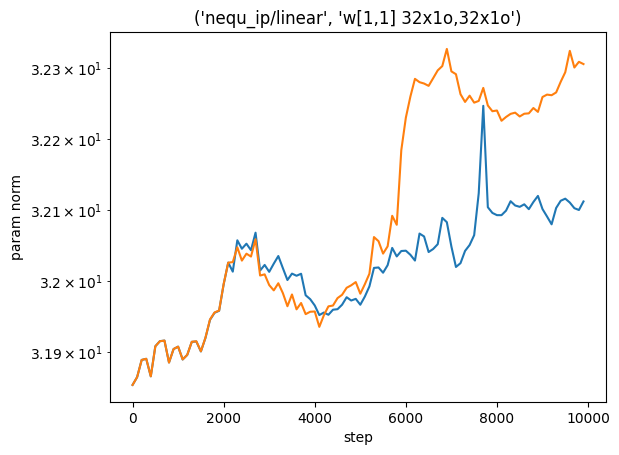

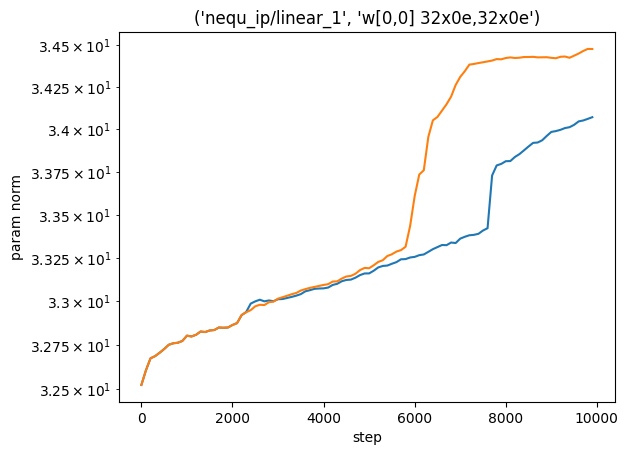

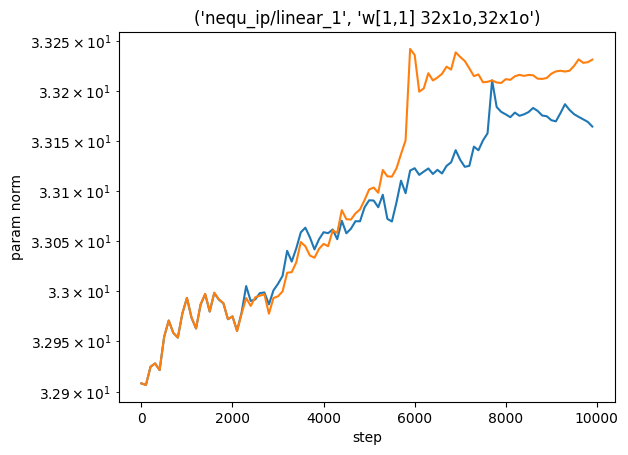

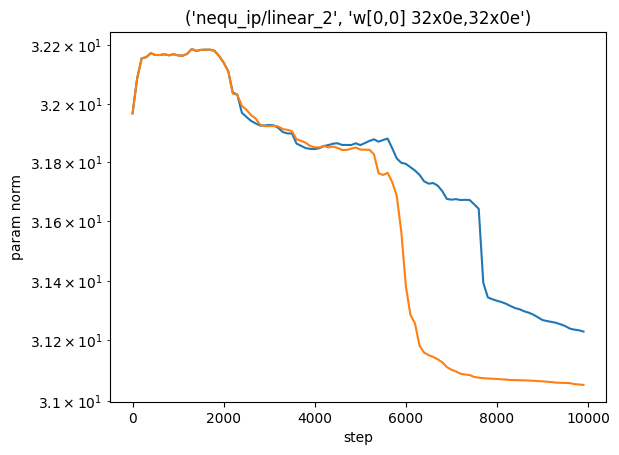

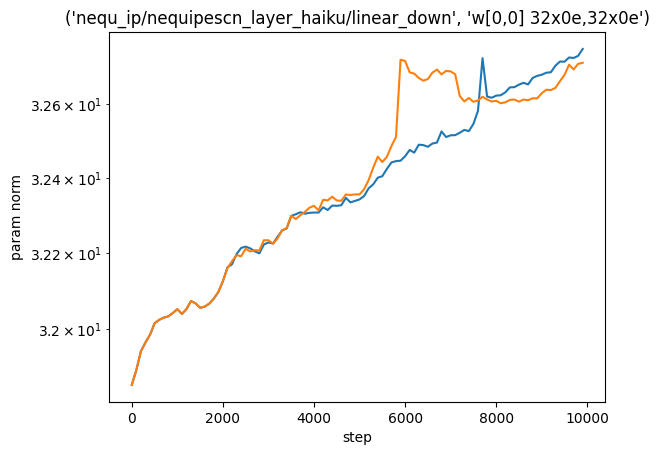

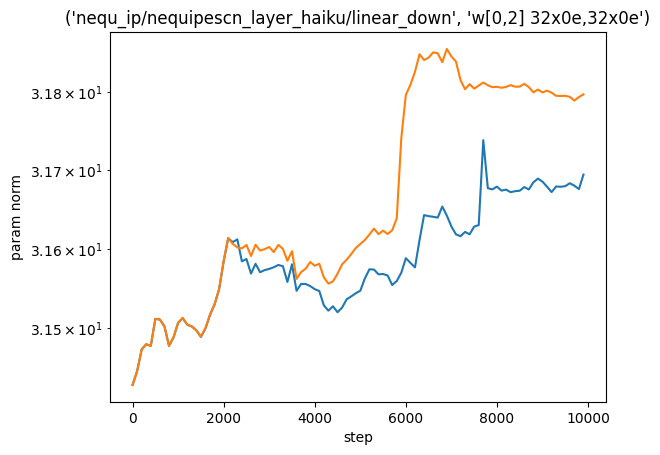

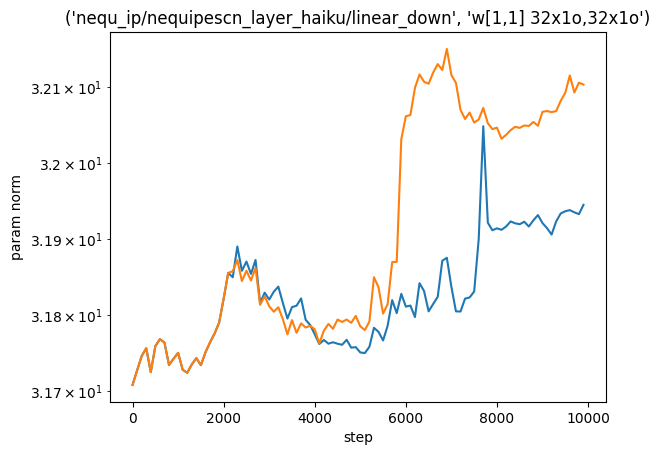

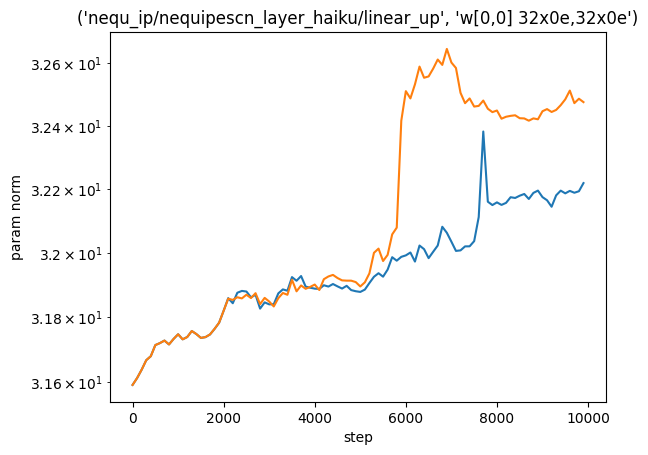

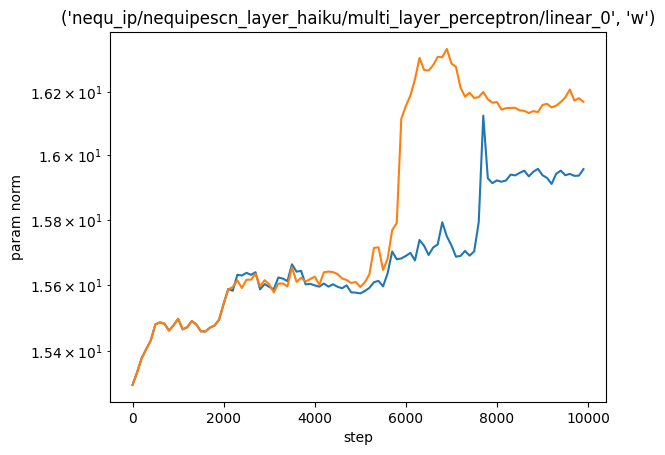

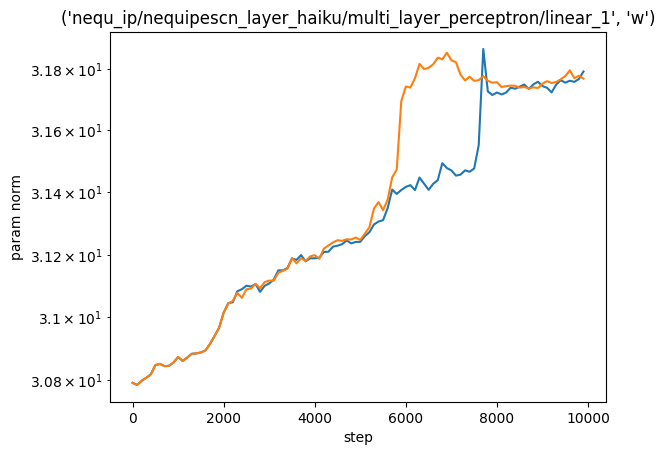

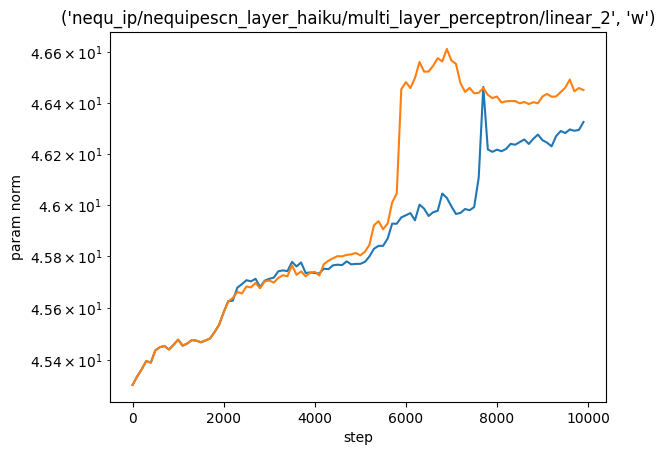

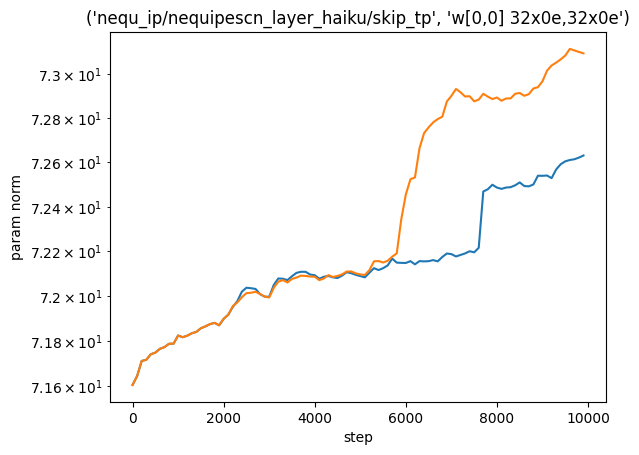

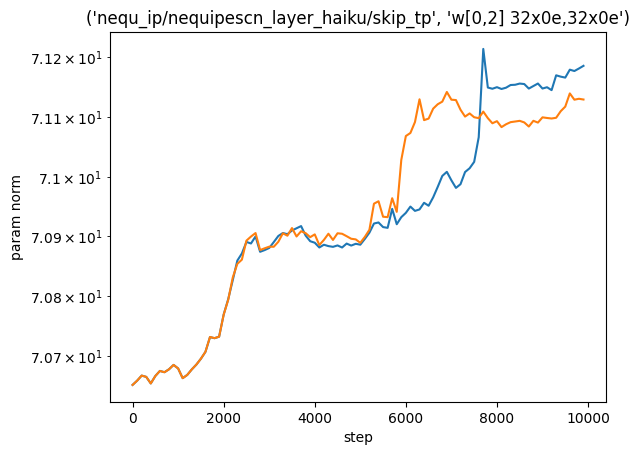

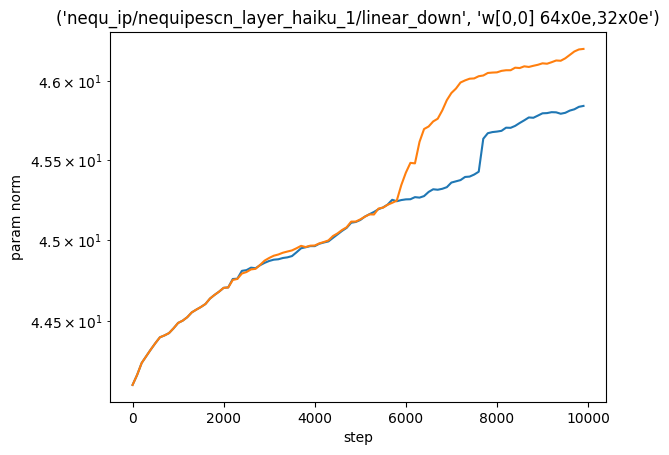

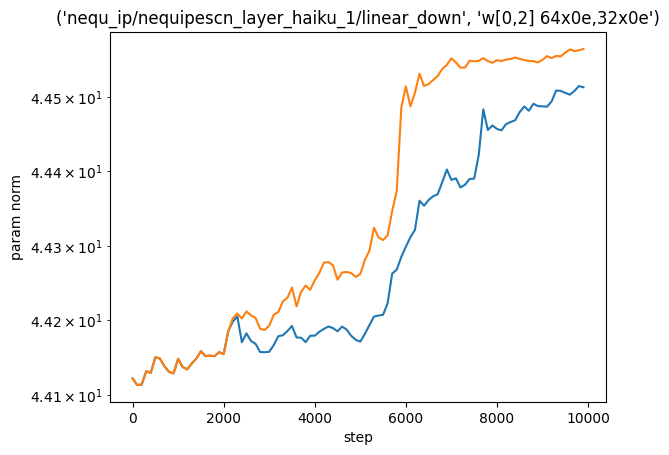

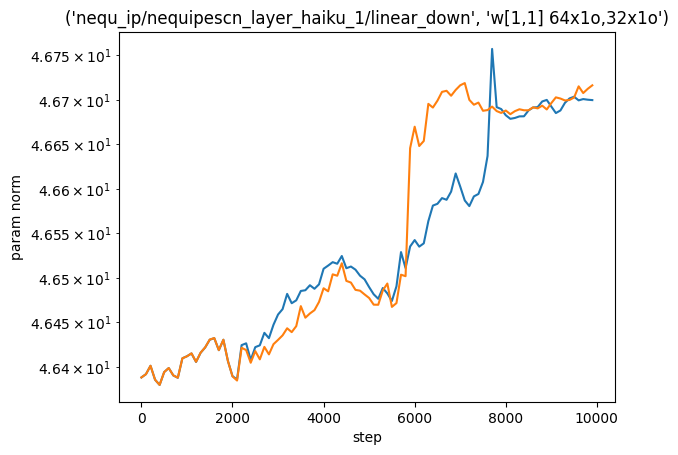

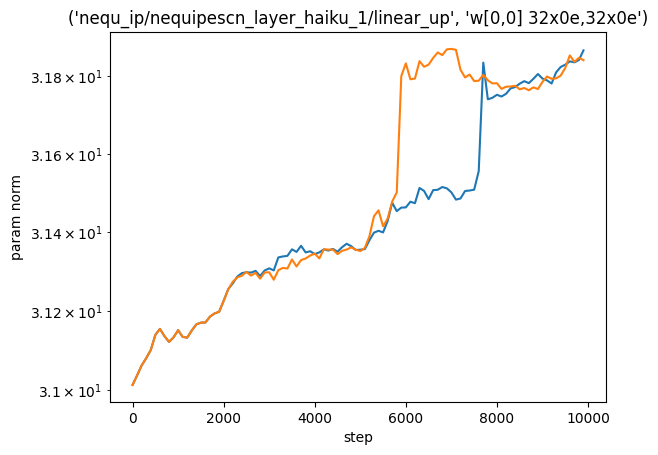

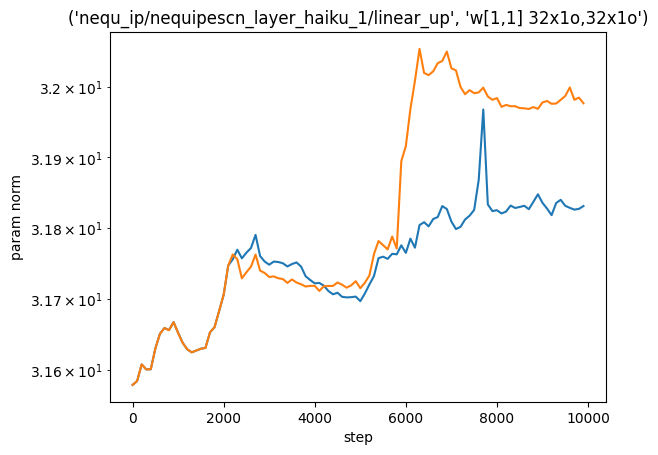

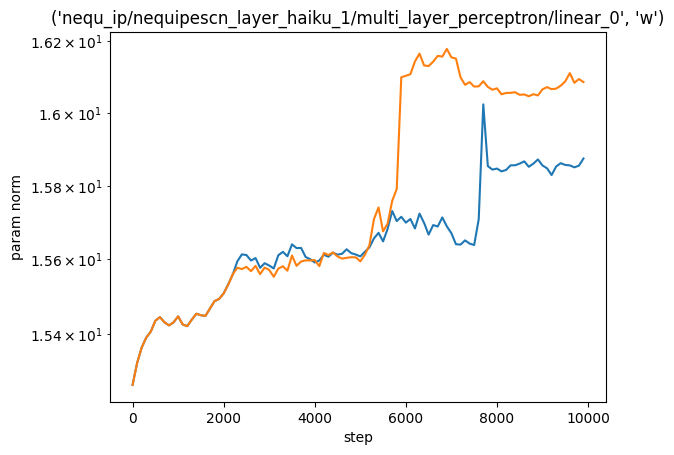

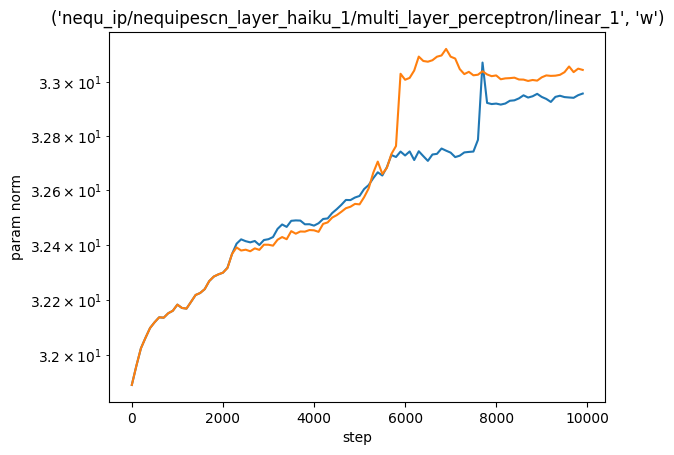

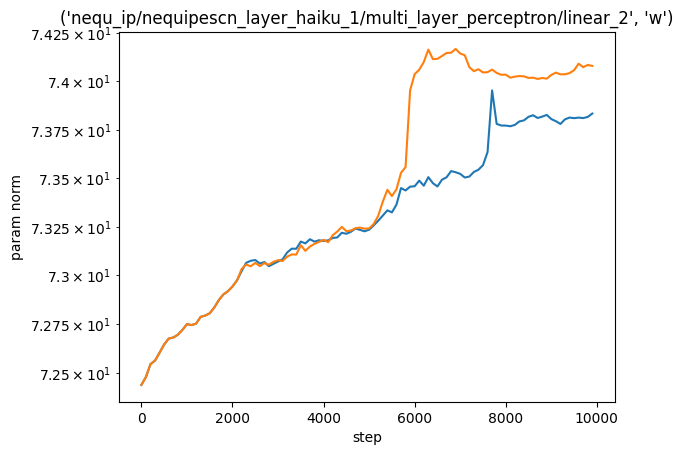

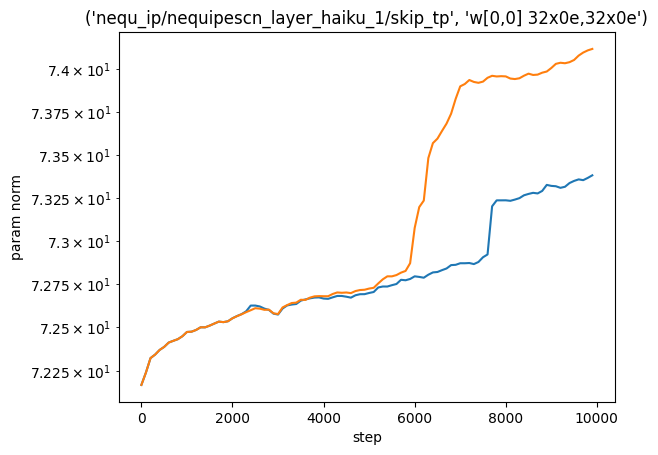

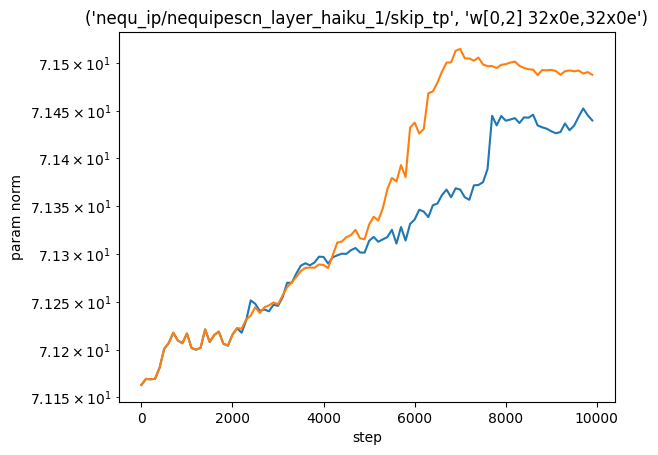

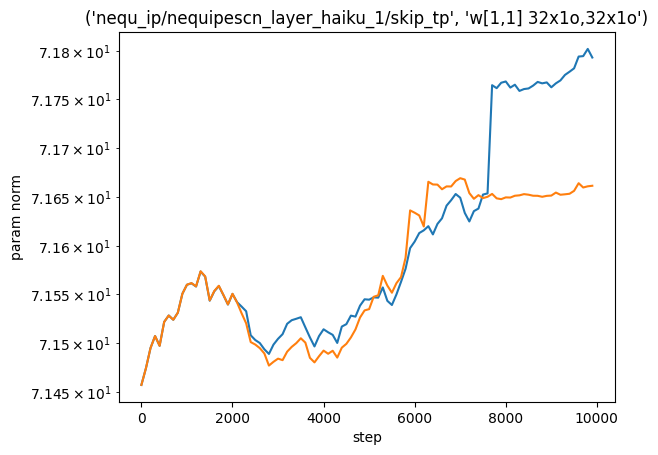

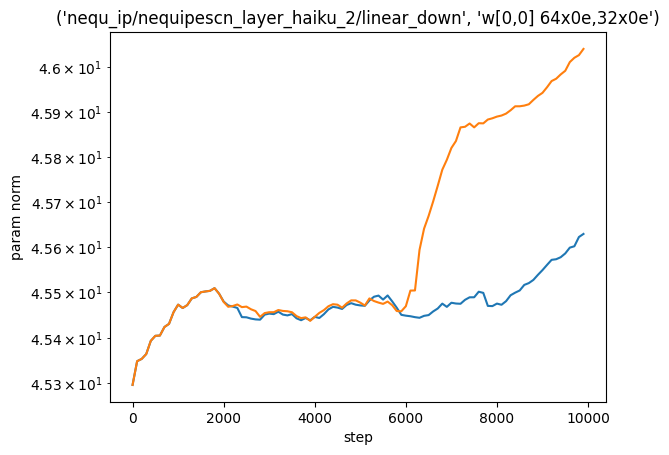

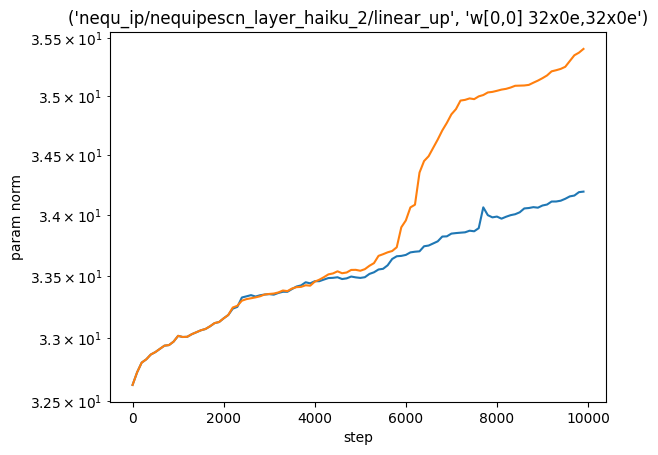

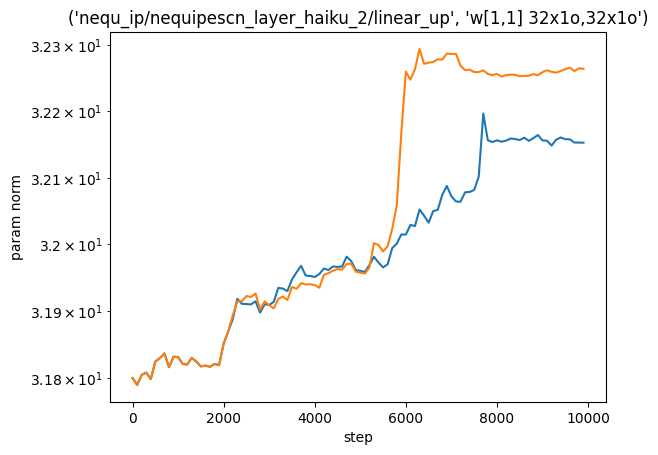

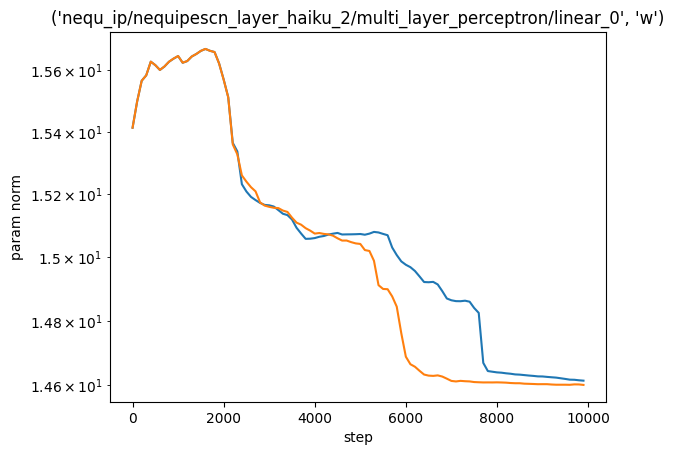

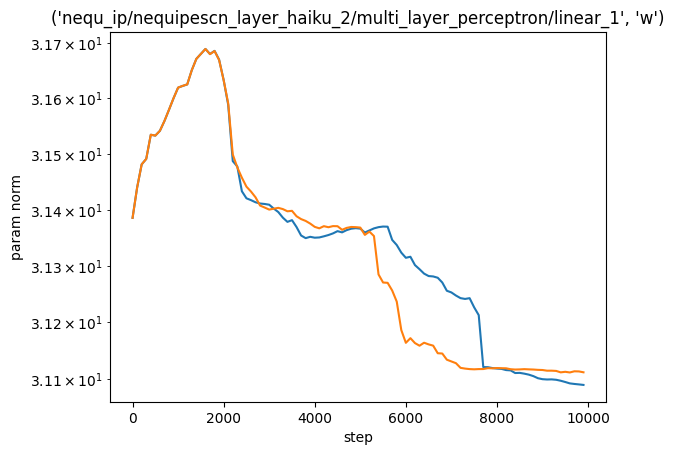

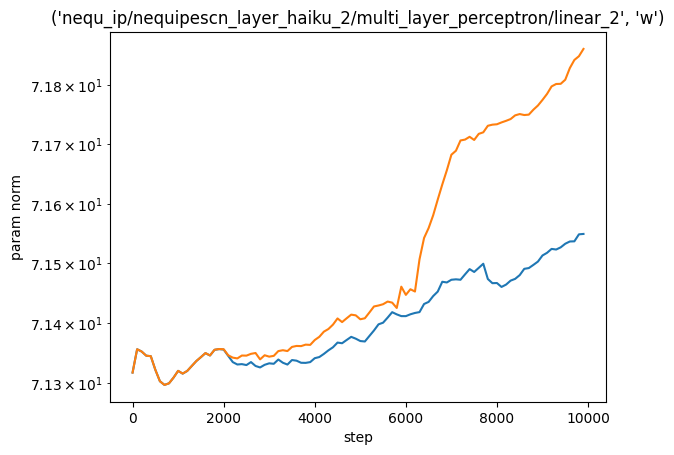

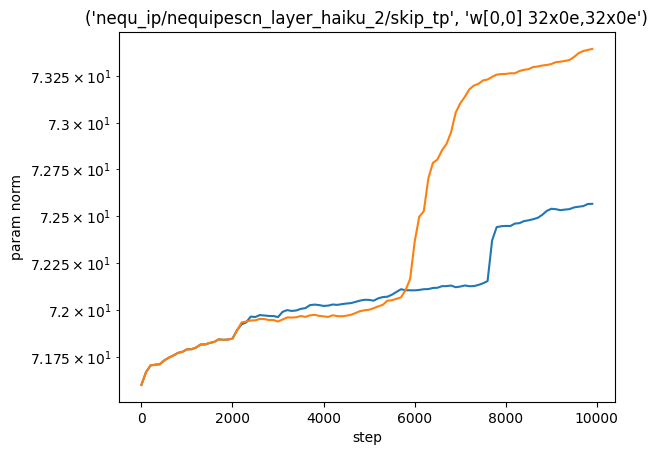

In [9]:
for k in sorted(flattened_param_norms_1.keys()):
    if flattened_grad_norms_1[k][0] == 0.0:
        continue
    plt.plot(steps, flattened_param_norms_1[k], label="Trial 1")
    plt.plot(steps, flattened_param_norms_2[k], label="Trial 2")
    plt.title(k)
    plt.ylabel("param norm")
    plt.xlabel("step")
    plt.yscale("log")
    plt.show()

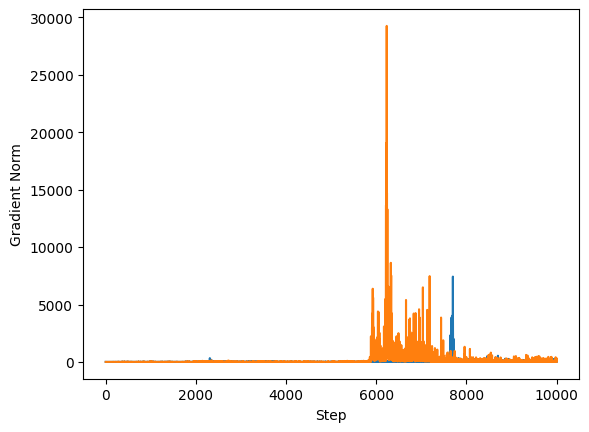

In [10]:

plt.plot(
    [ sum(jax.tree_util.tree_leaves(x)) for x in logs_1["grad_norms"]]
)
plt.plot(
    [ sum(jax.tree_util.tree_leaves(x)) for x in logs_2["grad_norms"]]
)
plt.xlabel("Step")
plt.ylabel("Gradient Norm")
plt.show()

In [11]:
plt.plot(logs["focus_and_atom_type_losses"])

NameError: name 'logs' is not defined

In [ ]:
print(logs["grad_norms"][0])

In [ ]:
d0 = flax.traverse_util.flatten_dict(logs_1["param_norms"][0])
d1 = flax.traverse_util.flatten_dict(logs_1["param_norms"][-1])




# plt.plot(
#     [ sum(jax.tree_util.tree_leaves(x)) for x in logs["param_norms"]]
# )

# i = np.argmax([ sum(jax.tree_util.tree_leaves(x)) for x in logs["grad_norms"]])
# i = np.argmax(logs["focus_and_atom_type_losses"])

# d1 = flax.traverse_util.flatten_dict(logs["param_norms"][i])

a = [(k, v1/v0) for (k, v0), (_, v1) in zip(d0.items(), d1.items())]
sorted(a, key=lambda x: x[1])[::-1]


In [ ]:
plt.plot(logs["focus_and_atom_type_losses"], "-o")
plt.plot(old_logs["focus_and_atom_type_losses"], ".")
# np.testing.assert_allclose(logs["focus_and_atom_type_losses"][:1000], old_logs["focus_and_atom_type_losses"][:1000], atol=1e-4)
print(np.min(logs["focus_and_atom_type_losses"]), np.min(old_logs["focus_and_atom_type_losses"]))
print(np.max(logs["focus_and_atom_type_losses"]), np.max(old_logs["focus_and_atom_type_losses"]))
plt.xlim(6000, 12000)
plt.ylim(0, 1)